
(ecosystem)=
# Ecosystem 

 
<iframe src="testbin/test5/index.html" width="100%" height="1000px"></iframe>

 



 




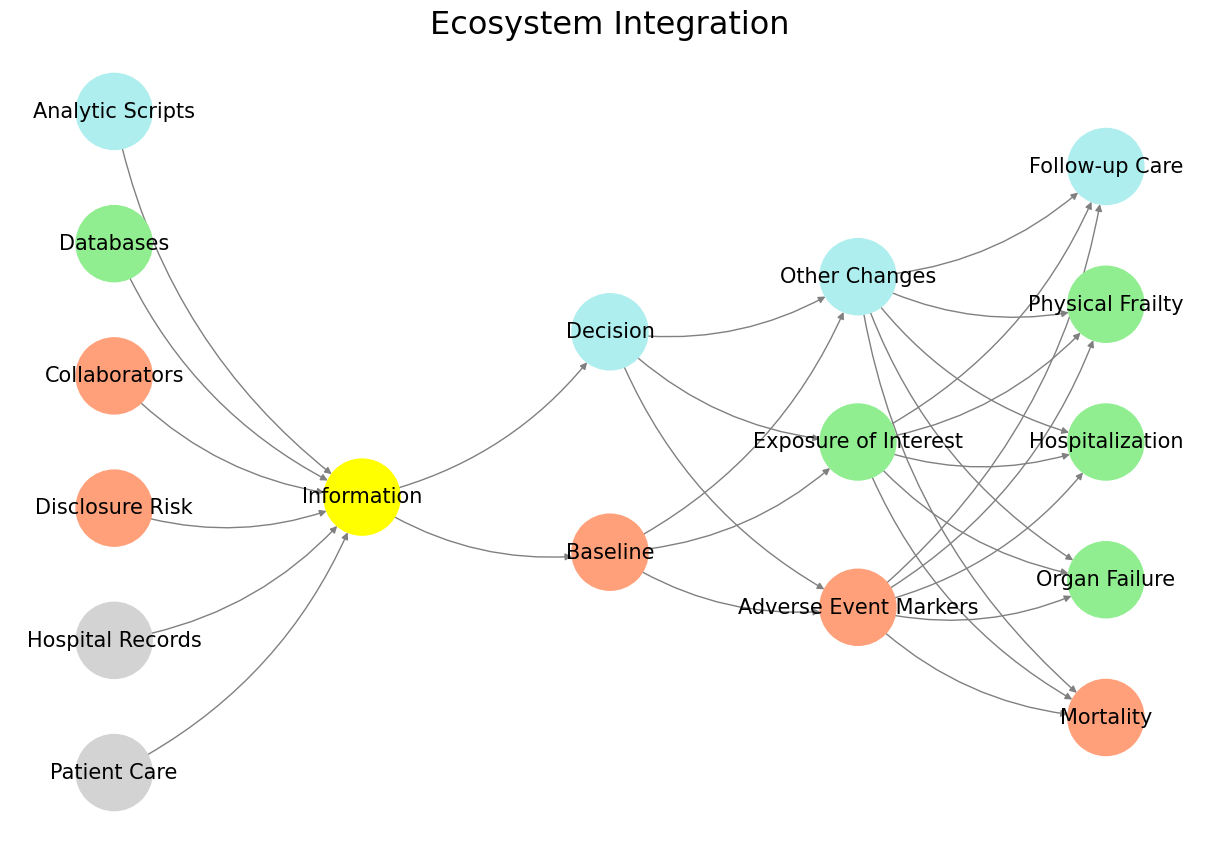

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network fractal
def define_layers():
    return {
        'Suis': ['Patient Care', 'Hospital Records', 'Disclosure Risk', 'Collaborators', 'Databases', 'Analytic Scripts', ], # Static
        'Voir': ['Information'],  
        'Choisis': ['Baseline', 'Decision'],  
        'Deviens': ['Adverse Event Markers', 'Exposure of Interest', 'Other Changes'],  
        "M'èléve": ['Mortality', 'Organ Failure',  'Hospitalization', 'Physical Frailty', 'Follow-up Care']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = { # Dynamic
        'yellow': ['Information'],  
        'paleturquoise': ['Analytic Scripts', 'Decision', 'Other Changes', 'Follow-up Care'],  
        'lightgreen': ['Databases', 'Exposure of Interest', 'Organ Failure', 'Physical Frailty', 'Hospitalization'],  
        'lightsalmon': [
            'Disclosure Risk', 'Collaborators', 'Baseline',  
            'Adverse Event Markers', 'Mortality'
        ],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))   

    # Add edges (automated for consecutive layers)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer, target_layer = layer_names[i], layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=15, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Ecosystem Integration", fontsize=23)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} figures/blanche.*
---
width: 1
height: 1
---

```

